In [1]:
from autograd import grad
import autograd.numpy as np
import autograd.numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline

xmin,xmax=0,10

Nonlinear regression with fixed basis functions

Given a set of basis functions $\phi_h(x)$, we represent our function class as $y_{pred}(x;\mathbf{w}) = \sum_h w_h \phi_h(x)$, and want to learn a vector $\mathbf{w}_{opt}$ of weights such that $y_{pred}(x;\mathbf{w}_{opt}) \approx y_{true}(x)$

In [566]:
n_basis_fxns=15
basis_points=np.linspace(xmin,xmax,n_basis_fxns)
basis_fxns = np.empty(n_basis_fxns,dtype=object)

class RBF():
    def __init__(self,center,r=1.0):
        self.c=center
        self.r=r

    def __call__(self,x):
        return np.exp(-(np.sum((x-self.c)**2) / (2*self.r**2)))

class StepFxn():
    def __init__(self,center,r=1.0):
        self.c=center
        self.r=r
    
    def __call__(self,x):
        return 1.0*(np.abs(x-self.c) < self.r)

#print(basis_points)
basis_expansion_of_1 = np.zeros(n_basis_fxns)

for i,c in enumerate(basis_points):
    
    basis_fxns[i]=RBF(c,0.5)
    #basis_fxns[i] = StepFxn(c)
    #print(phi(1.0))
    basis_expansion_of_1[i] = basis_fxns[i](1.0)

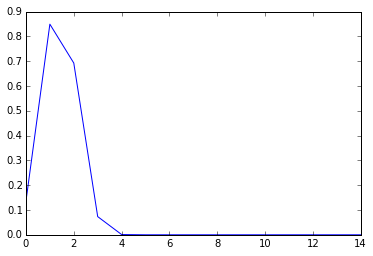

In [567]:
plt.plot(basis_expansion_of_1)

In [568]:
for fxn in basis_fxns:
    print(fxn(1.0))

0.135335283237
0.849365816568
0.692569324205
0.0733696513684
0.00100984423411
1.80583079846e-06
4.19550701874e-10
1.26641655491e-14
4.96653427578e-20
2.53055060031e-26
1.67517948323e-33
1.4407624984e-41
1.60993438774e-50
2.337268946e-60
4.40853133146e-71


In [569]:
basis_fxns

array([<__main__.RBF instance at 0x12cef4b48>,
       <__main__.RBF instance at 0x1226af4d0>,
       <__main__.RBF instance at 0x1226af830>,
       <__main__.RBF instance at 0x1226afab8>,
       <__main__.RBF instance at 0x1226af6c8>,
       <__main__.RBF instance at 0x122443cf8>,
       <__main__.RBF instance at 0x1225b4440>,
       <__main__.RBF instance at 0x1225b4098>,
       <__main__.RBF instance at 0x1222f6440>,
       <__main__.RBF instance at 0x1226be830>,
       <__main__.RBF instance at 0x1226befc8>,
       <__main__.RBF instance at 0x122a3ba28>,
       <__main__.RBF instance at 0x122a3bb90>,
       <__main__.RBF instance at 0x122a3bbd8>,
       <__main__.RBF instance at 0x122a3bd40>], dtype=object)

In [570]:
def basis_fxn_expansion(x):
    return np.array([f(x) for f in basis_fxns])

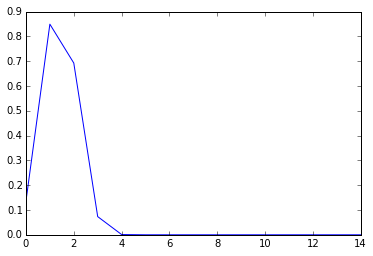

In [571]:
plt.plot(basis_fxn_expansion(1.0))

In [572]:
def pred_y(x,weights):
    phis = basis_fxn_expansion(x)
    return np.dot(weights,phis)

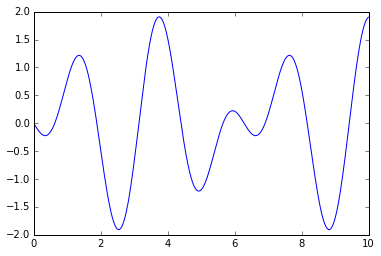

In [573]:
x = np.linspace(xmin,xmax,500)
def f(x):
    return np.sin(2*x) - np.sin(3*x)
y =  f(x)

plt.plot(x,y)

In [574]:
pred_y(5,np.ones(len(basis_fxns)))

1.7548609130099042

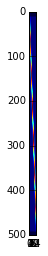

In [575]:
Q = np.array([basis_fxn_expansion(i) for i in x])
plt.imshow(Q)

In [576]:
np.dot(Q.T,np.ones(len(x))).shape

(15,)

In [577]:
def objective(weights):
    ''' minimize this'''
    #prior = np.sum(weights**2)
    #pred = np.array([pred_y(p,weights) for p in x])
    pred = np.dot(Q,weights)
    mse = np.sum((pred-y)**2)
    return mse
    #log_likelihood = - np.sum((pred-y)**2)
    #return prior + log_likelihood

In [578]:
from time import time
t = time()
objective(np.ones(len(basis_fxns)))
print(time() - t)

0.000166893005371


In [579]:
grad(objective)(np.ones(len(basis_fxns)))

array([ 103.9262841 ,  157.34852577,  160.02693102,  294.39181578,
        290.93787042,  122.9821193 ,  173.9500897 ,  287.15073685,
        248.10218691,  214.87686057,  166.10047866,  179.32050896,
        316.15932406,  248.52554628,   54.9405699 ])

In [580]:
def gradient_descent(objective,start_point,
                     n_iter=100,step_size=0.1):
    intermediates = np.zeros((n_iter,len(start_point)))
    gradient = grad(objective)
    x = start_point
    intermediates[0] = x
    for i in range(1,n_iter):
        update = gradient(x)*step_size
        x = x - update
        intermediates[i] = x
    return intermediates

In [581]:
w = gradient_descent(objective,npr.randn(len(basis_fxns)),
                        n_iter=10000,step_size=0.005)
w_opt = w[-1]

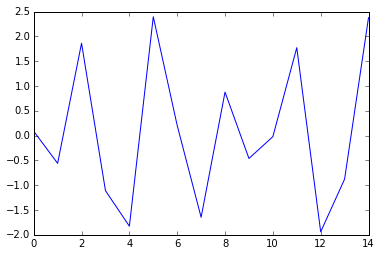

In [582]:
plt.plot(w_opt)

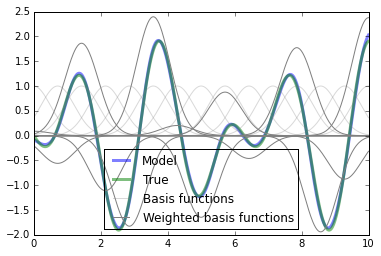

In [583]:
predicted = np.array([pred_y(i,w_opt) for i in x])
plt.plot(x,predicted,label='Model',linewidth=3,alpha=0.5)
plt.plot(x,y,label='True',linewidth=3,alpha=0.5)
for i,basis_fxn in enumerate(basis_fxns):
    if i == 0:
        plt.plot(x,[basis_fxn(x_) for x_ in x],c='grey',alpha=0.3,
                label='Basis functions')
        plt.plot(x,[basis_fxn(x_)*w_opt[i] for x_ in x],c='grey',
                 label='Weighted basis functions')
    else:
        plt.plot(x,[basis_fxn(x_)*w_opt[i] for x_ in x],c='grey')
        plt.plot(x,[basis_fxn(x_) for x_ in x],c='grey',alpha=0.3)

#plt.ylim(-3,2)
plt.legend(loc='best')

In [526]:
mse = np.sum((predicted - y)**2) / len(predicted)
mse

0.38187366304040632

Adaptive basis functions

$$y(\mathbf{x}; \mathbf{w}) = \sum_h w_h^{(2)} \text{tanh}\left(
\sum_i w_{hi}^{(1)}x_i + w_{h0}^{(1)}
\right) + w_0^{(2)}$$

In [370]:
import gptools

In [447]:
# reproducing Figure 1 from: http://mlg.eng.cam.ac.uk/pub/pdf/Ras04.pdf
import numpy as np
import numpy.random as npr
from numpy.linalg import cholesky
from numpy.matlib import repmat

xs = np.linspace(-5,5,1000)
ns = len(xs)
keps=1e-9

m = lambda x: 0.25*x**2
def K_mat(xs_1,xs_2):
    diff_mat = repmat(xs_1,len(xs_2),1) - repmat(xs_2,len(xs_1),1).T
    return np.exp(-0.5*(diff_mat)**2)

fs = m(xs) + cholesky(K_mat(xs,xs)+keps*np.eye(ns)).dot(npr.randn(ns))

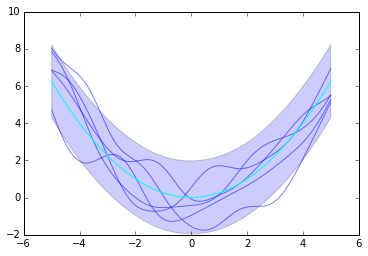

In [459]:
npr.seed(0)
mean = m(xs)
choleskied = cholesky(K_mat(xs,xs)+keps*np.eye(ns))



fs = np.zeros((10000,len(xs)))

for i in range(len(fs)):
    fs[i] = mean + choleskied.dot(npr.randn(ns))
    if i < 5:
        plt.plot(xs,fs[i],c='blue',alpha=0.5)

plt.plot(xs,fs.mean(0),c='cyan')
plt.fill_between(xs,fs.mean(0)+1.96*np.sqrt(fs.std(0)),fs.mean(0)-1.96*np.sqrt(fs.std(0)),alpha=0.2)

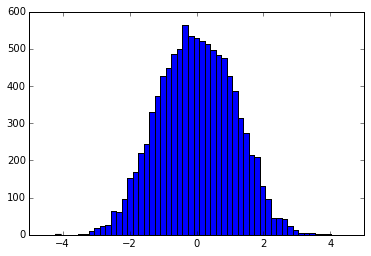

In [453]:
plt.hist([xs[np.argmin(f)] for f in fs],bins=50);

In [449]:
%timeit np.argmin(cholesky.dot(npr.randn(ns)))

The slowest run took 4.97 times longer than the fastest. This could mean that an intermediate result is being cached 
1000 loops, best of 3: 162 µs per loop


In [445]:
np.argmin(cholesky.dot(npr.randn(ns,100)))

cholesky.dot(npr.randn(ns,100)).shape

(1000, 100)

In [438]:
la.cholesky(K_mat(xs,xs)+keps*np.eye(ns)).shape

(1000, 1000)

<matplotlib.colorbar.Colorbar instance at 0x12023cdd0>

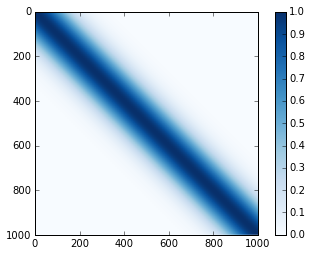

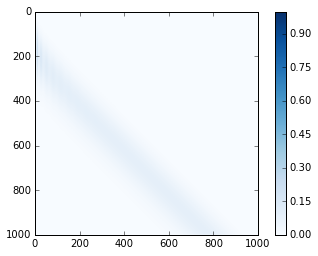

In [584]:
plt.imshow(K_mat(xs,xs),cmap='Blues',interpolation='none');
plt.colorbar()
plt.figure()

plt.imshow(la.cholesky(K_mat(xs,xs)+keps*np.eye(ns)),cmap='Blues',interpolation='none');
plt.colorbar()

In [418]:
# what's the minimum in this draw?
xs[np.argmin(fs)]

-1.6666666666666665